In [ ]:
# pyright: reportUnusedExpression=false

# Exercício avaliativo 1
## Introdução a Física Estatística e Computacional

Luís Felipe Ramos Ferreira - 2019022553

Igor Lacerda Faria da Silva - 2020041973

Gabriel Rocha Martins - 2019006639

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from typing import Callable

In [ ]:
ITERATIONS = 1000
SIZES = [10**2, 10**3, 10**4]
errors: list[float] = []

In [ ]:
def calculo_erro(values: np.ndarray, mean: float) -> float:
    variancia = np.square(values - mean).mean()
    desvio = np.sqrt(variancia)
    return desvio / np.sqrt(values.size)

In [ ]:
def first_method(inf: float, sup: float, funct, size: int, y_max: int):
    inside = 0
    for _ in range(size):
        x = np.random.uniform(inf, sup, 1)
        y = np.random.uniform(0, y_max, 1)
        expected_y = funct(x)
        if expected_y > y:
            inside += 1

    return inside / size * y_max * (sup - inf)

In [ ]:
def second_method(inf: float, sup: float, funct, size: int):
    mutiplier = (sup - inf) / size
    x = np.random.uniform(inf, sup, size)
    y = funct(x)
    return mutiplier * np.sum(y)

In [ ]:
def choose_method(inf: float, sup: float, funct, size: int, y):
    if y is not None:
        return first_method(inf, sup, funct, size, y)
    else:
        return second_method(inf, sup, funct, size)

In [ ]:
def plot_hist_iterate_method(
    iterations: int, inf: float, sup: float, funct, size: int, y
):
    data: np.ndarray = np.zeros(iterations)
    for i in range(iterations):
        data[i] = choose_method(inf, sup, funct, size, y)
    plt.hist(data)
    mean = data.mean()
    print(f"Média: {mean}")
    return calculo_erro(data, mean)

In [ ]:
def plot_all(inf: float, sup: float, funct: Callable, y: float | None):
    for size in SIZES:
        errors.append(plot_hist_iterate_method(ITERATIONS, inf, sup, funct, size, y))
        errors.append(plot_hist_iterate_method(ITERATIONS, inf, sup, funct, size, None))
        plt.show()

# Função 1

In [ ]:
INF_1 = 0
SUP_1 = 1
Y_MAX_1 = 1

In [ ]:
def plot_1():
    x = np.linspace(INF_1, SUP_1, 100)
    y = 1 - x**2
    plt.title("$1 - x^2$")
    plt.plot(x, y)


plot_1()

In [ ]:
def funct_1(x: float) -> float:
    return 1 - x**2

In [ ]:
plot_all(INF_1, SUP_1, funct_1, Y_MAX_1)

# Função 2

In [ ]:
INF_2 = 0
SUP_2 = 1
Y_MAX_2 = 3

In [ ]:
def plot_2():
    x = np.linspace(INF_2, SUP_2, 100)
    y = np.e**x
    plt.title("$e^x$")
    plt.plot(x, y)


plot_2()

In [ ]:
def funct_2(x: float) -> float:
    return np.e**x

In [ ]:
plot_all(INF_2, SUP_2, funct_2, Y_MAX_2)

# Função 3

In [ ]:
INF_3 = 0
SUP_3 = np.pi
Y_MAX_3 = 1

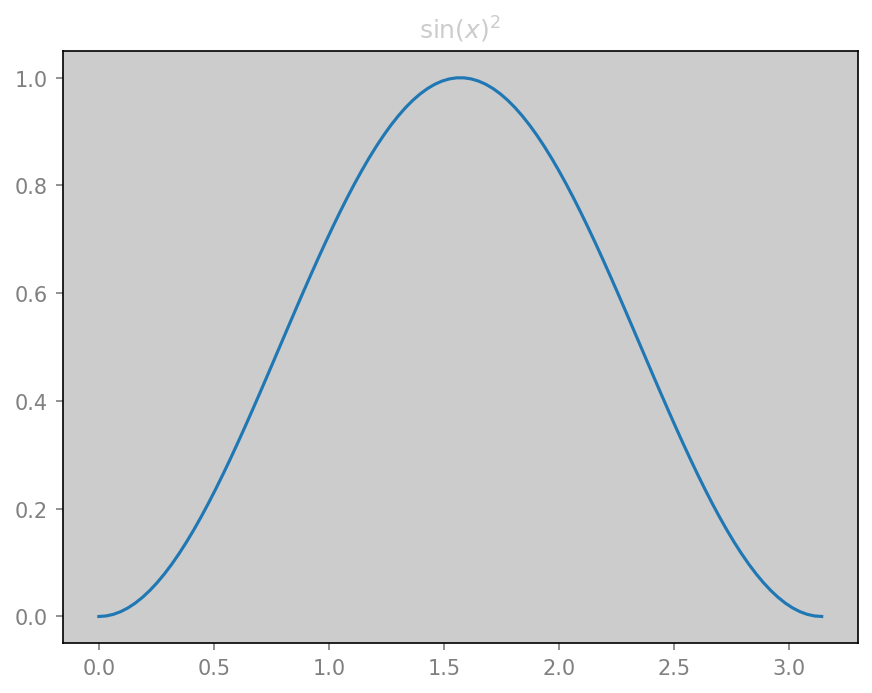

In [1]:
def plot_3():
    x = np.linspace(INF_3, SUP_3, 100)
    y = np.sin(x) ** 2
    plt.title(r"$\sin(x)^2$")
    plt.plot(x, y)


plot_3()

In [ ]:
def funct_3(x: float) -> float:
    return np.sin(x) ** 2

In [ ]:
plot_all(INF_3, SUP_3, funct_3, Y_MAX_3)

Em primeiro lugar, como esperado pelo Teorema do Limite Central, a distribuição
dos valores gerados nos histogramas se aproxima de uma distribuição normal,
com a média muito próxima do valor analítico. Além disso, em todos os casos, o
método 2 apresentou um conjunto de resultados cujos valores possuem um desvio
padrão menor do que os gerados pelo método 1, o que nos leva a inferir que ele
teve um desempenho mais promissor na estimativa das integrais. Entretanto,
devemos tentar entender o porque disso.

As funções testadas com o método 1, de amostragem de pontos abaixo da curva,
possuem "uma camada de aleatoriedade maior" do que as testadas com o método 2,
uma vez que devemos gerar pontos aleatórios, sendo que estes possuem
coordenadas x e y. O método de Monte Carlo, utilizando o valor médio, seleciona
aleatoriamente apenas o valor de x, tornando sua distribuição de valores menos
incerta. Assim, o desvio padrão do segundo método se mostra menor. 

In [ ]:
errors

## Erros

O cálculo dos erros estimativos seguiram o que era esperado: quanto maior o
número de valores gerados para estimar a integral, menor será a diferença entre
a estimativa e o valor analítico. É importante salientar que os erros foram
calculados considerando que não há correlação entre os valores gerados, ou
seja, assumimos que o gerador de números aleatórios é perfeito. Na prática esse
pode não ser o caso, mas o gerador de números aleatório da biblioteca Numpy
garante um alto nível de independência entre os números gerados.

# Exercício 4

Neste exercício utilizaremos o método 2 de Monte Carlo para aproximar o valor
de um integral em 9 dimensões

In [ ]:
def funct_4(x: list):
    return 1 / ((x[0] + x[1]) * x[2] + (x[3] + x[4]) * x[5] + (x[6] + x[7]) * x[8])

Criando função que generaliza a aplicação do método 2 ( MonteCarlo ) para esse caso

In [ ]:
def MonteCarlo_9d(N, funct: Callable):
    acumulador = 0
    for _ in range(N):
        acumulador = acumulador + funct(np.random.uniform(0, 1, 9))
    return acumulador / N

Foram escolhidas 1000 iterações do algoritmo, uma vez que um número maior não
melhorou a aproximação.

In [ ]:
ITERATIONS_4 = 1000
SIZES_4 = [10**2, 10**3, 10**4]

In [ ]:
def carlao(size: float):
    amostra = np.zeros(ITERATIONS_4)
    for i in range(ITERATIONS_4):
        amostra[i] = MonteCarlo_9d(size, funct_4)
    return amostra.mean(), amostra

In [ ]:
for size in SIZES_4:
    media, amostra = carlao(size)
    plt.hist(amostra)
    plt.show()
    print(media)
    print(calculo_erro(amostra, media))

O cálculo da integral da função de 9 variáveis se comportou como esperado, dado
que com o aumento no tamanho da amostra para fazer essa aproximação, o desvio
padrão diminuiu. Além disso, é possível notar que a aproximação utilizando o
método 2 apresenta um desempenho melhor do que o esperado, dado que mesmo com o
aumento de números aleatórios criados, o tempo de execução não aumentou tanto.